# Full evolutionary trajectory

In [1]:
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap
from collections import defaultdict
import matplotlib.gridspec as gridspec
import numpy as np


import estaudel.escaffolding as escaffolding
import estaudel.stochastic as stochastic
import estaudel.heredity.process as ehp
import estaudel.heredity.deterministic as ehd
import estaudel.heredity.stochastic as ehs

panel_dict = dict(xy=(1, 1), xycoords="axes fraction",
           ha='center', va='center',
            bbox=dict(boxstyle="round",
               ec=(.1, 0.1, .1),
               fc=(1., 1, 1),
           ))

# Data

In [2]:
path_selection = "out/full_trajectory.321.1_20180629_163801_selection\"rank\"_NPROC8.pkle"
path_neutral = "out/full_trajectory.321.5_20180629_163801_NPROC8_selection\"neutral\".pkle"
prefix_out = "one"

In [3]:
path_selection = "out/full_trajectory.321.2_20180629_163801_NPROC8_selection\"rank\".pkle"
path_neutral = "out/full_trajectory.321.4_20180629_163801_selection\"neutral\"_NPROC8.pkle"
prefix_out = "two"

In [4]:
path_selection = "out/full_trajectory.321.0_20180629_163804_selection\"rank\"_NPROC8.pkle"
path_neutral = "out/full_trajectory.321.3_20180629_163801_selection\"neutral\"_NPROC8.pkle"
prefix_out = "three"

In [5]:
data = (escaffolding.load(path_neutral), escaffolding.load(path_selection))

In [6]:
for d in data:
    print(d)
    print("\n".join(["{}: {}".format(k,v) for k,v in sorted(d.parameters.items())]))
    print('---')

Ecological scaffolding data 9999 generations
B: 15
D: 1000
N: 10000
NPROC: 8
T: 1
carrying_capacity: 1500
collectiveSelectionStrength: 1
continue: None
goal: 0.5
initial_type0: (0, 6, 0.8, 0.15)
initial_type1: (1, 4, 0.3, 0.15)
max_types: 4
mutation_effect: {1: 0.1, 3: 0.1}
mutation_rate: 1
name: out/full_trajectory.321.3
percentile: 20
selection: neutral
skip: 100
steps: 100
---
Ecological scaffolding data 9999 generations
B: 15
D: 1000
N: 10000
NPROC: 8
T: 1
carrying_capacity: 1500
collectiveSelectionStrength: 1
continue: None
goal: 0.5
initial_type0: (0, 6, 0.8, 0.15)
initial_type1: (1, 4, 0.3, 0.15)
max_types: 4
mutation_effect: {1: 0.1, 3: 0.1}
mutation_rate: 1
name: out/full_trajectory.321.0
percentile: 20
selection: rank
skip: 100
steps: 100
---


# Functions

In [7]:
def plot_density(out):
    fig = plt.figure(figsize=(10,4))
    ax = plt.gca()

    cp_density = out.data['cp_density'] * out.parameters['D']  

    zbin_cp = [-100,1]+list(np.logspace(1,np.log10(out.parameters['D']),20,base=10))
    cm = np.array([(0,0,0,0)] + list(plt.cm.viridis_r(np.linspace(0,1,len(zbin_cp)))))

    im = ax.contourf(cp_density,
                    extent=[0,cp_density.shape[1],0,1],
                    levels=zbin_cp,
                    colors=cm)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="4%", pad=0.05)
    tk =  [1,10,100,1000]
    cbar = fig.colorbar(im, 
                        spacing='uniform',
                        cax=cax, 
                        ticks=tk,
                        label='Number of Collectives')
    cbar.ax.set_yticklabels([x if x>0 else 0 for x in tk]) 
    ax.set(xlabel='Collective Generation',
           ylabel='Collective Phenotype')

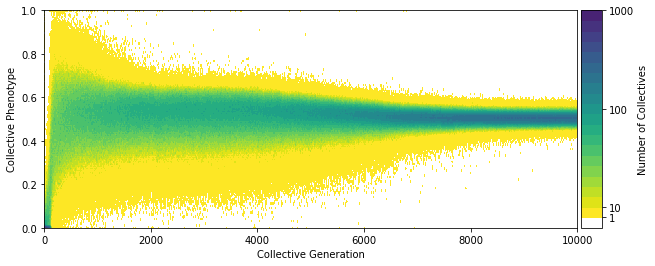

In [8]:
plot_density(d)

# Individual and collectvie traits

In [9]:
d.data['individual_traits_density'].keys()

dict_keys([('red', 'interaction_inter'), ('blue', 'growth_rate'), ('red', 'growth_rate'), ('blue', 'interaction_inter')])

In [10]:
Nbreak = 30

mx_trait = {}
for k in ('growth_rate','interaction_inter'):
    mx_trait[k] = (np.min([d.data['individual_traits_bins'][k].min() for d in data]),
             np.max([d.data['individual_traits_bins'][k].max() for d in data]))

mx = 0
D = 0
for d in data:
    D = max(D, d.parameters['D'])
    for k in d.data['individual_traits_density'].keys():
            mx = max(mx,d.data['individual_traits_density'][k].max())

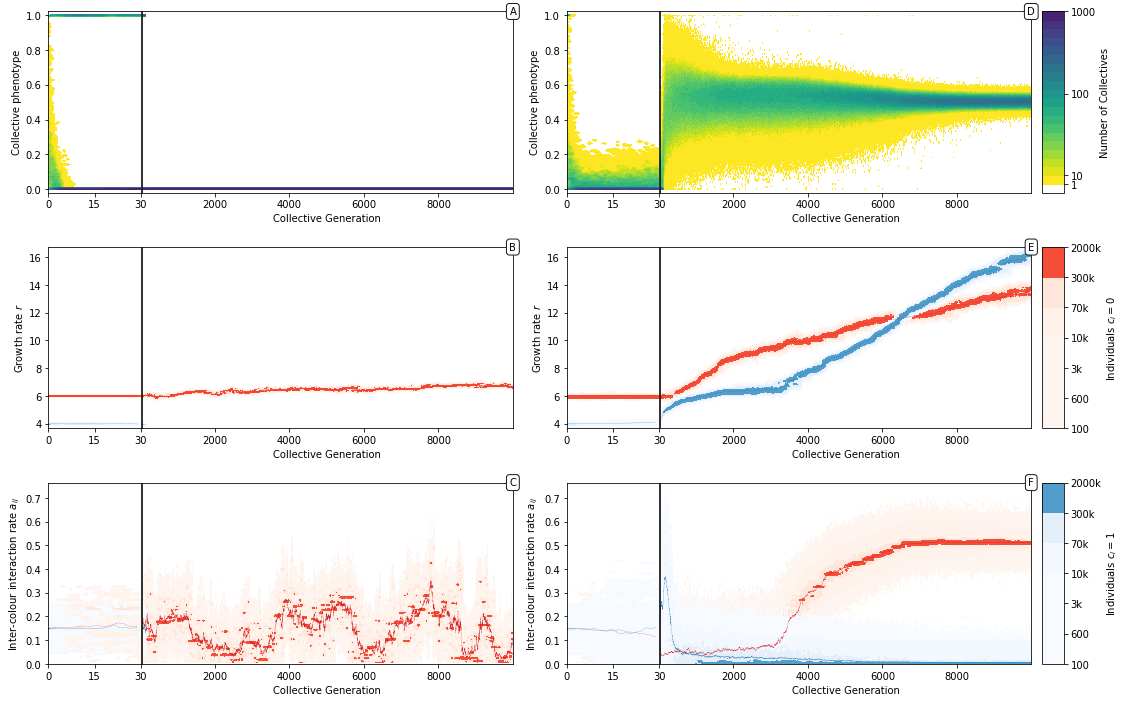

In [11]:
fig = plt.figure(figsize=(15,12))
tk =  [1,10,100,1000]

gs = [gridspec.GridSpec(nrows=3, ncols=5, left=0.05, right=0.48,
                        wspace=0.01, hspace=0.3),
      gridspec.GridSpec(nrows=3, ncols=5, left=0.53, right=0.96,
                         wspace=0.01, hspace=0.3)]
g = gridspec.GridSpec(nrows=3, ncols=1, left=0.97, right=0.99,
                 wspace=0.01, hspace=0.3)



rounder = np.vectorize(lambda x : round(x, -int(np.floor(np.log10(abs(x))))))

zbin = np.int_(rounder(list(np.logspace(0,np.log10(mx),10,base=10)[3:])))
zbin_cp = [0.0000001]+list(np.logspace(0,np.log10(D),20,base=10))

zbin_cp = [-100,1]+list(np.logspace(1,np.log10(data[0].parameters['D']),20,base=10))
cmap_cp = np.array([(0,0,0,0)] + list(plt.cm.viridis_r(np.linspace(0,1,len(zbin_cp)))))
    
zbin_names = ['{}k'.format(int(x)//1000) if x>1000 else x for x in zbin]
zbin_names


mx_trait = {}
for k in ('growth_rate','interaction_inter'):
    mx_trait[k] = (np.min([d.data['individual_traits_bins'][k].min() for d in data]),
             np.max([d.data['individual_traits_bins'][k].max() for d in data]))

gs = [gridspec.GridSpec(nrows=3, ncols=5, left=0.05, right=0.48,
                        wspace=0.01, hspace=0.3),
      gridspec.GridSpec(nrows=3, ncols=5, left=0.53, right=0.96,
                         wspace=0.01, hspace=0.3)]
g = gridspec.GridSpec(nrows=3, ncols=1, left=0.97, right=0.99,
                 wspace=0.01, hspace=0.3)


mx = 0
D = 0
for i in [0,1]:
    D = max(D, data[i].parameters['D'])
    for pos in (1,3):
        for color in (0,1):
            mx = max(mx,data[i].data['individual_traits_density'][(ehs.COLOR_NAMES[color],
                                                                   ehs.POS_NAMES[pos])].max())


cax = []
cax.append(fig.add_subplot(g[0, 0]))
cax.append(fig.add_subplot(g[1, 0]))
cax.append(fig.add_subplot(g[2, 0]))

labels = ['ABC','DEF']

for i in (0,1):

    ax = []
    ax.append(fig.add_subplot(gs[i][0, 0]))
    ax.append(fig.add_subplot(gs[i][0, 1:]))

    ax.append(fig.add_subplot(gs[i][1, 0]))
    ax.append(fig.add_subplot(gs[i][1, 1:]))

    ax.append(fig.add_subplot(gs[i][2, 0]))
    ax.append(fig.add_subplot(gs[i][2, 1:]))

    
    for j,x in enumerate([1,3,5]):
        ax[x].set(yticks=[],
              xlabel='Collective Generation',
              xticks=[2000,4000,6000,8000])
        ax[x].annotate(labels[i][j], xy=(1, 1), xycoords="axes fraction",
                       ha='center', va='center',
                        bbox=dict(boxstyle="round",
                           ec=(.1, 0.1, .1),
                           fc=(1., 1, 1),
                       ))


    for x in [0,2,4]:
        ax[x].set(xticks=[0,Nbreak//2,Nbreak])
        
    ax[0].set(ylabel=r'Collective phenotype')
    ax[2].set(ylim = mx_trait['growth_rate'], ylabel=r'Growth rate $r$')
    ax[3].set(ylim = mx_trait['growth_rate'])
    ax[4].set(ylim = mx_trait['interaction_inter'], ylabel=r'Inter-colour interaction rate $a_{ij}$')
    ax[5].set(ylim = mx_trait['interaction_inter'])


    cp_density = (data[i].data['cp_density'] * data[i].parameters['D'])
    individual_traits_density = data[i].data['individual_traits_density']
    individual_traits_bins = data[i].data['individual_traits_bins']
    
    im = ax[0].contourf(cp_density[:,:Nbreak],
               extent=[0,Nbreak,0,1],
                levels=zbin_cp,
               colors=cmap_cp)
    im = ax[1].contourf(cp_density[:,Nbreak:],
                   extent=[Nbreak,cp_density.shape[1],0,1],
                    levels=zbin_cp,
                   colors=cmap_cp)
    if i == 0:
        cbar = fig.colorbar(im,ax=ax[0],cax=cax[0], 
                     ticks=tk,
                     label='Number of Collectives')
        cbar.ax.set_yticklabels([x if x>0 else 0 for x in tk]) 

    ax[0].set(ylim=(-0.02,1.02))
    ax[1].set(ylim=(-0.02,1.02))

    
    CMAP_LIST = [plt.cm.Reds, plt.cm.Blues]
    for pos,axid in zip((1,3), (2,4)):
        for color in (0,1):
            key = (ehs.COLOR_NAMES[color], ehs.POS_NAMES[pos])
            cm = CMAP_LIST[color](np.arange(CMAP_LIST[color].N))
            
            d = data[i].data['individual_traits'][key]
            d['c'] = d.value*d.number
            values = (d.groupby('generation').sum()['c']/d.groupby('generation').sum()['number']).values

            #cm[0,-1] = 0
            cm = ListedColormap(cm)
            ax[axid].plot(np.arange(0,Nbreak), 
                          values[:Nbreak],
                          color=['C3','C0'][color],
                         ls='--', lw=0.3,)
            ax[axid+1].plot(np.arange(Nbreak,individual_traits_density[key].shape[1]), 
                          values[Nbreak:],
                         color=['C3','C0'][color],
                         ls='--',lw=0.3,)

            im = ax[axid].contourf(individual_traits_density[key][:,:Nbreak], 
                 extent=[0,
                         Nbreak,
                         individual_traits_bins[key[1]].min(),
                         individual_traits_bins[key[1]].max()], 
                         levels=zbin,
                         cmap=cm)
            im = ax[axid+1].contourf(individual_traits_density[key][:,Nbreak:], 
                             extent=[Nbreak,
                                     individual_traits_density[key].shape[1],
                                     individual_traits_bins[key[1]].min(),
                                     individual_traits_bins[key[1]].max()], 
                             levels=zbin,
                             cmap=cm)
            if i == 0 and pos == 1:
                cb = fig.colorbar(im,ax=ax[axid],
                             cax=cax[1+color],
                                  ticks=zbin,
                             label='Individuals $c_i = {}$'.format(color))
                cax[1+color].set_yticklabels(zbin_names) 
    
fig.savefig('full_trajectory.pdf', bbox_inches='tight')
fig.savefig('full_trajectory.png', bbox_inches='tight')

# Collective genotypes

In [12]:
def plot_pstar_density(ax, out, zbin, colors, tk):
    
    nstep = 100
    b = np.linspace(0,1,nstep+1)
    fixed_point_density = np.zeros((nstep, out.data['pstar'].shape[0]+1))
    for n in range(out.data['pstar'].shape[0]):
        fixed_point_density[:,n], _ = np.histogram(np.nan_to_num(out.data['pstar'][n,:]),bins=b)

    
    ax.hlines(out.parameters['goal'],
          0, 
          out.current_gen,
          color='grey',
          linestyles='--',
          label='Optimal proportion, $\mu^*$')
    im = ax.contourf(fixed_point_density, 
                     levels=zbin,
                     extent=[0, out.current_gen, 0, 1], 
                     colors=colors)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right",
                              size="4%", 
                              pad=0.11)
    cbar = fig.colorbar(im,ax=ax,cax=cax, 
         ticks=tk,
         label='Number of Collectives')
    cbar.ax.set_yticklabels([x if x>0 else 0 for x in tk]) 
    
    ax.set(xlabel='Collective Generation',
           ylabel=r'Fixed point of G when $T \to + \infty$, $p^*$',
           ylim=(0,1.01),
           xlim=(0,out.current_gen))
    ax.legend(loc='upper left')
    
def plot_tstar_density(ax, out, zbin, colors, tk):
    
    nstep = 100
    b = np.linspace(0,1.1*np.nan_to_num(out.data['tstar']).max(),nstep+1)
    den_tcrit = np.zeros((nstep, out.data['tstar'].shape[0]+1))
    for n in range(out.current_gen):
        try:
            remove_nan = lambda x: x[np.logical_not(np.isnan(x))]
            den_tcrit[:,n], _ = np.histogram(remove_nan(out.data['tstar'][n,:]),
                                             bins=b)
        except ValueError:
            pass
    
    ax.hlines(out.parameters['T'],
          0, 
          out.current_gen,
          color='grey',
          linestyles='--',
          label='Duration of the growth phase, $T$')
    im = ax.contourf(den_tcrit, 
                     levels=zbin,
                     extent=[0, out.current_gen, 0, b.max()], 
                     colors=colors)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right",
                              size="4%", 
                              pad=0.11)
    cbar = fig.colorbar(im,ax=ax,cax=cax, 
         ticks=tk,
         label='Number of Collectives')
    cbar.ax.set_yticklabels([x if x>0 else 0 for x in tk]) 
    
    ax.set(xlabel='Collective Generation',
           ylabel=r'Critical growth phase duration, $T^*$',
           ylim=(0,b.max()),
           xlim=(0,out.current_gen))
    ax.legend(loc='lower left')

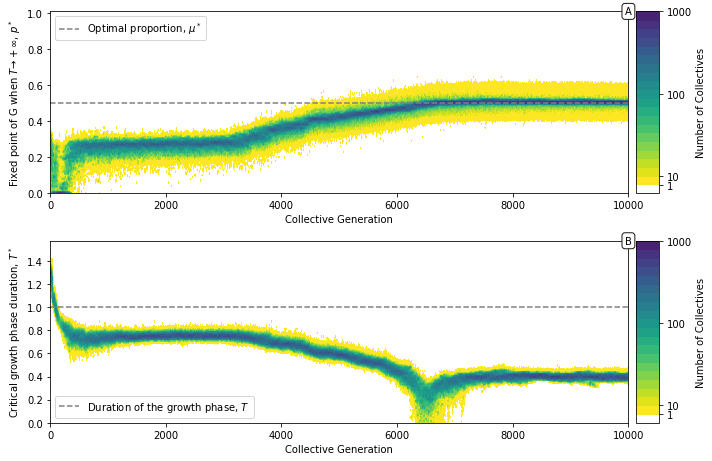

In [13]:
fig, ax = plt.subplots(2,1,figsize=(10,6.5))
ax[0].annotate('A', **panel_dict)
ax[1].annotate("B", **panel_dict)
plot_pstar_density(ax[0], data[1], zbin_cp, cmap_cp, tk)
plot_tstar_density(ax[1], data[1], zbin_cp, cmap_cp, tk)

plt.tight_layout()
plt.savefig('tstarpstar.pdf', bbox_inches='tight')
plt.savefig('tstarpstar.png', bbox_inches='tight')
